In [12]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

In [13]:
df=pd.read_excel('/content/dubai sales.xlsx')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      230 non-null    object 
 1   Invoiced  230 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.7+ KB


In [16]:
df.describe()

,Invoiced
count,230.000000
mean,20023.221217
std,68166.007987
min,0.000000
25%,0.000000
50%,0.000000
75%,9393.000000
max,662000.000000


In [17]:
df['Date'] = pd.to_datetime(df['Date'] )

# Verify the conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      230 non-null    datetime64[ns]
 1   Invoiced  230 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB
None


In [18]:
df.columns

Index(['Date', 'Invoiced'], dtype='object')

In [19]:
figure = px.bar(df, x = "Date", y= "Invoiced")
figure.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [20]:
figure = px.line(df, x='Date', y='Invoiced', title='Dubai')
figure.update_xaxes(rangeslider_visible=True)
figure.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [21]:
figure = px.line(df, x='Date', y='Invoiced',
                 title='Dubai with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<Figure size 640x480 with 0 Axes>

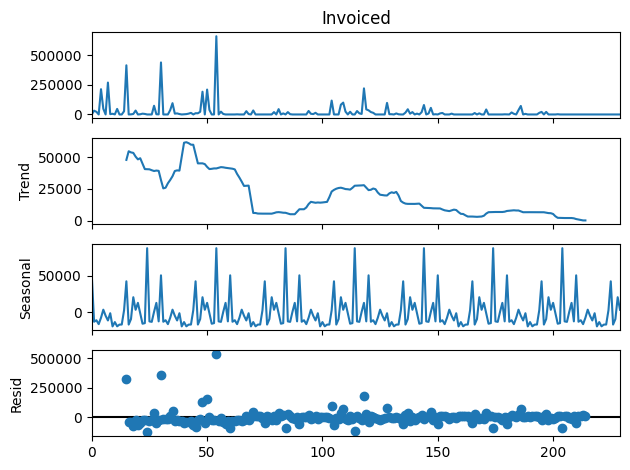

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Invoiced"], model='additive', period=30)

fig = plt.figure()
fig = result.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

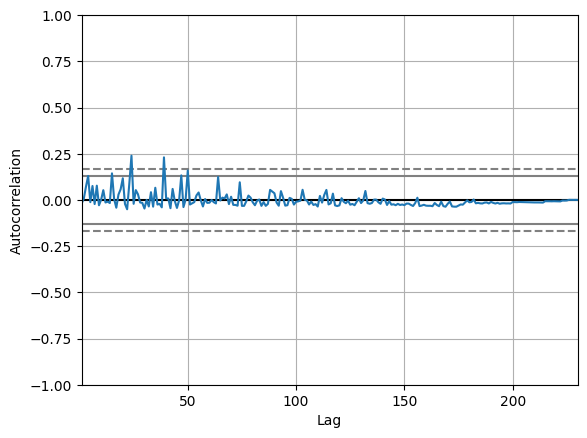

In [23]:
pd.plotting.autocorrelation_plot(df["Invoiced"])

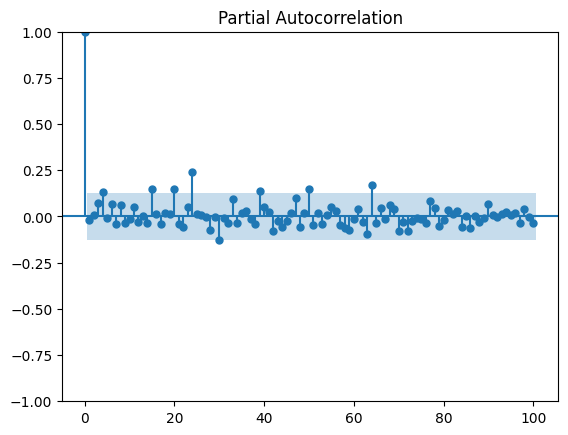

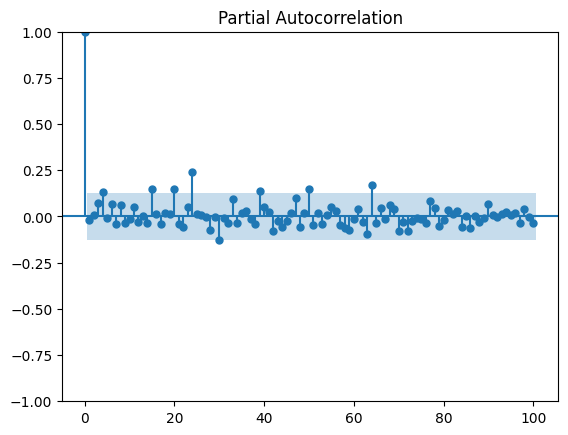

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Invoiced"], lags = 100)

In [25]:
import  statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller

In [26]:
def adfuller_test(df):
    result = adfuller(df)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations']
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
        if result[1] <= 0.05:
            print('Strong evidence against the null value hypothesis (HO), reject the null hypothesis')
        else:
            print('Weak evidence against the null value hypothesis (HO), do not reject the null hypothesis')

adfuller_test(df['Invoiced'])


ADF Test Statistic: -15.356568070484455
Strong evidence against the null value hypothesis (HO), reject the null hypothesis
p-value: 3.6599897135635716e-28
Strong evidence against the null value hypothesis (HO), reject the null hypothesis
#Lags Used: 0
Strong evidence against the null value hypothesis (HO), reject the null hypothesis
Number of Observations: 229
Strong evidence against the null value hypothesis (HO), reject the null hypothesis


In [28]:
p, d, q = 3, 0,8
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df["Invoiced"], order=(p, d, q))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:               Invoiced   No. Observations:                  230
Model:                 ARIMA(3, 0, 8)   Log Likelihood               -2885.897
Date:                Thu, 29 Aug 2024   AIC                           5797.793
Time:                        11:48:44   BIC                           5842.488
Sample:                             0   HQIC                          5815.822
                                - 230                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.002e+04   1.81e+04      1.108      0.268   -1.54e+04    5.54e+04
ar.L1         -0.6793      0.085     -8.038      0.000      -0.845      -0.514
ar.L2          0.7840      0.076     10.300      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [30]:
predictions = fitted.predict()
print(predictions)

0      20023.221220
1      20378.088285
2      19599.068459
3      18585.415916
4      18970.854299
           ...     
225      563.318066
226    11262.574100
227    13056.307179
228    -1104.404766
229    22221.248441
Name: predicted_mean, Length: 230, dtype: float64


<Axes: >

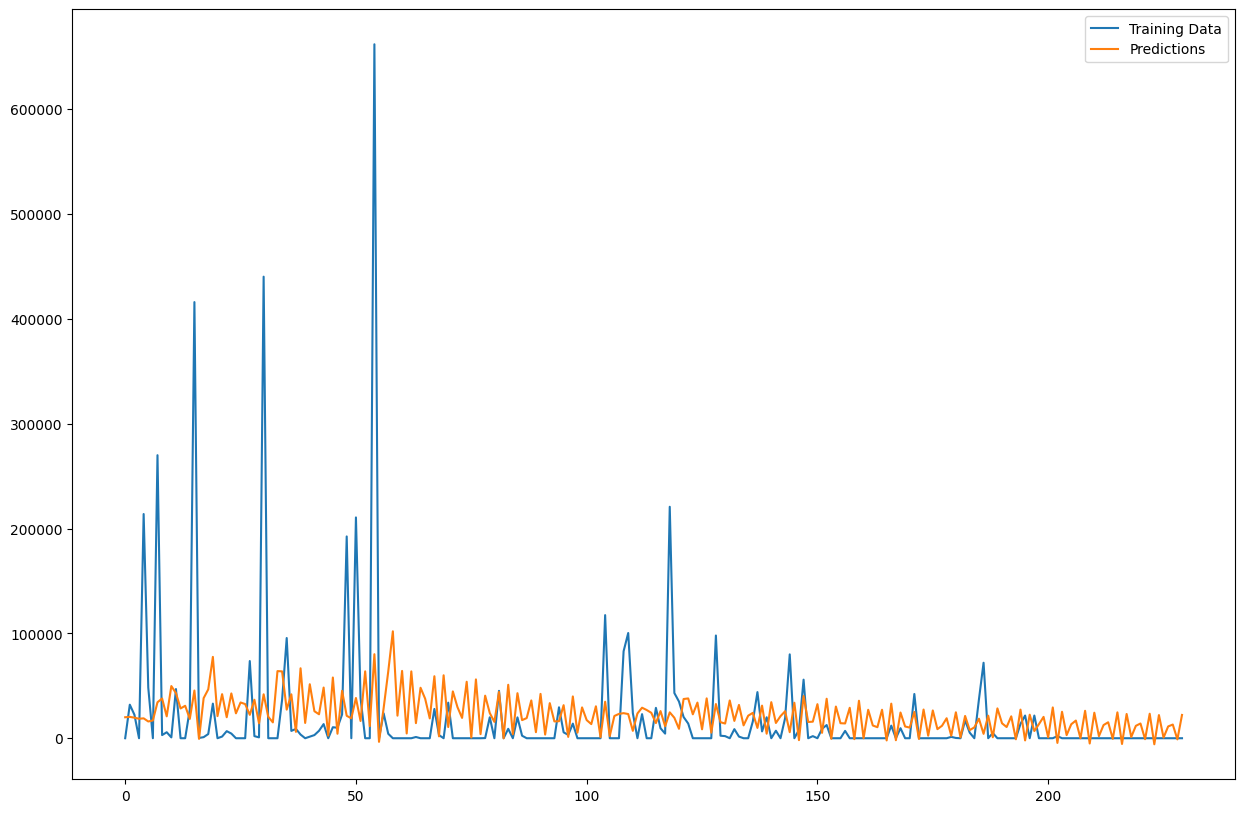

In [32]:
df["Invoiced"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [38]:
# prompt: i want to present it to infront of stake holders of mine

# Create a figure with subplots
fig = go.Figure()

# Add the original time series data
fig.add_trace(go.Scatter(x=df['Date'], y=df['Invoiced'], mode='lines', name='Original Data'))

# Add the predicted values
fig.add_trace(go.Scatter(x=df['Date'], y=predictions, mode='lines', name='Predictions'))

# Customize the layout
fig.update_layout(
    title="Dubai Sales Forecast",
    xaxis_title="Date",
    yaxis_title="Invoiced Amount",
    legend_title="Data",
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    height=600,
    width=1000
)

# Show the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [39]:
# prompt: i want to present the future 2 years invoiced value forcatring

# Create a future date range
future_dates = pd.date_range(start=df['Date'].max(), periods=24, freq='M')  # 2 years = 24 months

# Create a DataFrame for future dates
future_df = pd.DataFrame(index=future_dates, columns=['Invoiced'])

# Concatenate the original DataFrame with the future DataFrame
extended_df = pd.concat([df[['Invoiced']], future_df])

# Predict the future values
future_predictions = fitted.predict(start=len(df), end=len(extended_df)-1)

# Assign the predictions to the future DataFrame
extended_df['Invoiced'][len(df):] = future_predictions

# Create a figure with subplots
fig = go.Figure()

# Add the original time series data
fig.add_trace(go.Scatter(x=df['Date'], y=df['Invoiced'], mode='lines', name='Original Data'))

# Add the predicted values
fig.add_trace(go.Scatter(x=extended_df.index, y=extended_df['Invoiced'], mode='lines', name='Predictions'))

# Customize the layout
fig.update_layout(
    title="Dubai Sales Forecast (2 Years)",
    xaxis_title="Date",
    yaxis_title="Invoiced Amount",
    legend_title="Data",
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    height=600,
    width=1000
)

# Show the plot
fig.show()


<ipython-input-39-0895ba569bad>:10: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [40]:
# prompt: give me the predictions in an excel sheet with dates

# Create a DataFrame with the predictions and dates
predictions_df = pd.DataFrame({'Date': extended_df.index, 'Predictions': extended_df['Invoiced']})

# Save the DataFrame to an Excel file
predictions_df.to_excel('dubai_sales_predictions.xlsx', index=False)


In [41]:
# prompt: i wanto upload this file into my local device path is "C:\Users\tetra\Downloads"

from google.colab import files
files.download('dubai_sales_predictions.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# prompt: this prediction date columns are in int format how i can change it based on training data i want the future dates predictions

# Create a future date range based on the training data's frequency
future_dates = pd.date_range(start=df['Date'].max(), periods=24, freq=df['Date'].diff().mean())

# Create a DataFrame for future dates
future_df = pd.DataFrame(index=future_dates, columns=['Invoiced'])

# Concatenate the original DataFrame with the future DataFrame
extended_df = pd.concat([df[['Invoiced']], future_df])

# Predict the future values
future_predictions = fitted.predict(start=len(df), end=len(extended_df)-1)

# Assign the predictions to the future DataFrame
extended_df['Invoiced'][len(df):] = future_predictions

# Create a figure with subplots
fig = go.Figure()

# Add the original time series data
fig.add_trace(go.Scatter(x=df['Date'], y=df['Invoiced'], mode='lines', name='Original Data'))

# Add the predicted values
fig.add_trace(go.Scatter(x=extended_df.index, y=extended_df['Invoiced'], mode='lines', name='Predictions'))

# Customize the layout
fig.update_layout(
    title="Dubai Sales Forecast (2 Years)",
    xaxis_title="Date",
    yaxis_title="Invoiced Amount",
    legend_title="Data",
    font=dict(
        family="Arial",
        size=12,
        color="black"
    ),
    height=600,
    width=1000
)

# Show the plot
fig.show()


# Create a DataFrame with the predictions and dates
predictions_df = pd.DataFrame({'Date': extended_df.index, 'Predictions': extended_df['Invoiced']})

# Save the DataFrame to an Excel file
predictions_df.to_excel('dubai_sales_predictions.xlsx', index=False)


files.download('dubai_sales_predictions.xlsx')


<ipython-input-44-92f112ca36fd>:10: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>